## Distribution-Based Clustering

Distribution-based clustering involves fitting the data to a statistical distribution model. The most common method is using Gaussian Mixture Models (GMM), where data points are assumed to be generated from a mixture of several Gaussian distributions with unknown parameters.

### Gaussian Mixture Models (GMM)
Gaussian Mixture Models are probabilistic models that assume the data is generated from a mixture of several Gaussian distributions. GMM is widely used due to its flexibility and effectiveness in capturing the underlying data structure.


## Gaussian Mixture Models (GMM)

### Mathematical Foundation

A Gaussian Mixture Model represents a mixture of $K$ Gaussian distributions. Each distribution is characterized by its mean $\mu$ and covariance $\Sigma$. The probability density function for a GMM is given by:

---


>$$p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)$$

Where:
- $\pi_k$ is the mixing coefficient for the $k$-th Gaussian component.
- $\mathcal{N}(x | \mu_k, \Sigma_k)$ is the Gaussian distribution with mean $\mu_k$ and covariance $\Sigma_k$.


---

The Gaussian distribution $\mathcal{N}(x | \mu, \Sigma)$ is defined as:

---


>$$\mathcal{N}(x | \mu, \Sigma) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)$$

Where:
- $d$ is the dimensionality of the data.
- $|\Sigma|$ is the determinant of the covariance matrix $\Sigma$.
- $(x - \mu)^T \Sigma^{-1} (x - \mu)$ is the Mahalanobis distance.


---

### Algorithm Steps

1. **Initialization**: Initialize the parameters $\pi_k$, $\mu_k$, and $\Sigma_k$.
2. **Expectation Step (E-step)**: Calculate the responsibility that each Gaussian component $k$ takes for each data point $x_i$.
---


>$$\gamma_{ik} = \frac{\pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_i | \mu_j, \Sigma_j)}$$


---
3. **Maximization Step (M-step)**: Update the parameters $\pi_k$, $\mu_k$, and $\Sigma_k$ to maximize the likelihood of the data given the responsibilities.
---


>$$\pi_k = \frac{N_k}{N}$$

>$$\mu_k = \frac{1}{N_k} \sum_{i=1}^{N} \gamma_{ik} x_i$$

>$$\Sigma_k = \frac{1}{N_k} \sum_{i=1}^{N} \gamma_{ik} (x_i - \mu_k)(x_i - \mu_k)^T$$

Where: $N_k = \sum_{i=1}^{N} \gamma_{ik}$


---
4. **Convergence**: Repeat the E-step and M-step until convergence is achieved.

### Implementation with Example

Let's implement GMM on a synthetic dataset.

Silhouette Score: 0.6444471808170211


C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


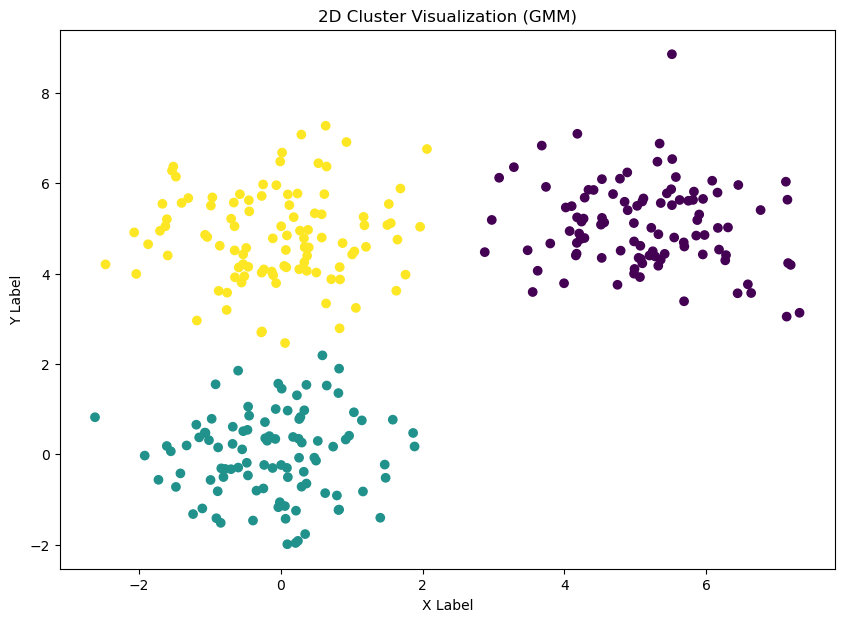

In [6]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Generate synthetic data
np.random.seed(42)
data = np.vstack([
    np.random.normal(loc=(0, 0), scale=1, size=(100, 2)),
    np.random.normal(loc=(5, 5), scale=1, size=(100, 2)),
    np.random.normal(loc=(0, 5), scale=1, size=(100, 2))
])

# Fit GMM to the data
gmm = GaussianMixture(n_components=3, random_state=42)
labels = gmm.fit_predict(data)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Plot 2D visualization
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('2D Cluster Visualization (GMM)')
plt.show()


## Cluster Evaluation

Evaluating clusters helps measure the quality and homogeneity of clusters formed by a clustering algorithm. Here are some commonly used methods for evaluating GMM:

### AIC (Akaike Information Criterion)
AIC is used to compare different models and choose the one that best explains the data with the fewest parameters. It is defined as:

---


>$$\text{AIC} = 2k - 2\ln(L)$$

Where:
- $k$ is the number of parameters in the model.
- $L$ is the maximized value of the likelihood function for the model.


---

**Interpretation**:
- Lower AIC values indicate a better model. The model with the lowest AIC is considered the best fit for the data, balancing goodness of fit and complexity.

### BIC (Bayesian Information Criterion)
BIC is similar to AIC but includes a penalty term for the number of parameters, helping to avoid overfitting. It is defined as:

---


>$$\text{BIC} = \ln(N)k - 2\ln(L)$$

Where:
- $N$ is the number of data points.
- $k$ is the number of parameters in the model.
- $L$ is the maximized value of the likelihood function for the model.


---

**Interpretation**:
- Lower BIC values indicate a better model. The model with the lowest BIC is considered the best fit, with a stronger penalty for complexity than AIC. It is particularly useful for model selection when the number of observations is large.


### Silhouette Score
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A high silhouette value indicates well-formed clusters.

---


>$$s = \frac{b - a}{\max(a, b)}$$

Where:
- $a$ is the average distance from the point to the other points in the same cluster.
- $b$ is the average distance from the point to the points in the nearest cluster.


---

**Interpretation**:
- Silhouette scores range from -1 to 1.
  - A score close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
  - A score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
  - A score close to -1 indicates that the object might have been assigned to the wrong cluster.


### Implementing AIC, BIC, and Silhouette Score in Python


In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

# Generate synthetic data
np.random.seed(42)
data = np.vstack([
    np.random.normal(loc=(0, 0), scale=1, size=(100, 2)),
    np.random.normal(loc=(5, 5), scale=1, size=(100, 2)),
    np.random.normal(loc=(0, 5), scale=1, size=(100, 2))
])

# Fit GMM to the data
gmm = GaussianMixture(n_components=3, random_state=42)
labels = gmm.fit_predict(data)

# Calculate AIC and BIC
aic = gmm.aic(data)
bic = gmm.bic(data)
print(f"AIC: {aic}")
print(f"BIC: {bic}")

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data, labels)
print(f"Silhouette Score: {silhouette_avg}")


C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


AIC: 2326.208872409881
BIC: 2389.173174479037
Silhouette Score: 0.6444471808170211


## 2D and 3D Visualizations

Visualizations help understand the structure of clusters. Here are examples of 2D and 3D visualizations using GMM.

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


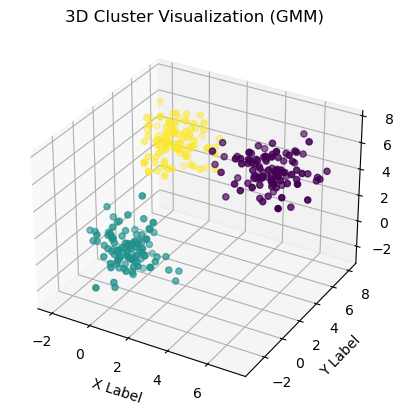

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture

# Generate synthetic 3D data
np.random.seed(42)
data_3d = np.vstack([
    np.random.normal(loc=(0, 0, 0), scale=1, size=(100, 3)),
    np.random.normal(loc=(5, 5, 5), scale=1, size=(100, 3)),
    np.random.normal(loc=(0, 5, 5), scale=1, size=(100, 3))
])

# Fit GMM to the 3D data
gmm_3d = GaussianMixture(n_components=3, random_state=42)
labels_3d = gmm_3d.fit_predict(data_3d)

# 3D cluster visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels_3d, cmap='viridis')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Cluster Visualization (GMM)')

plt.show()

## Extensions and Variants of GMM

There are several extensions and variants of Gaussian Mixture Models to handle different types of data and improve clustering performance.

### Variational Bayesian Gaussian Mixture Models
Uses variational inference to approximate the posterior distribution of the model parameters, allowing for automatic selection of the number of components.

### Hidden Markov Models (HMM)
Combines GMM with Markov chains to model sequential data, widely used in speech recognition and time series analysis.

### Applications of Variants

- **Variational Bayesian GMM**: Used when the number of clusters is not known in advance and needs to be determined from the data.
- **HMM**: Applied in areas where the data has temporal dependencies, such as speech and finance.
